- 1 Choose the number K of cluser
- 2 select at random k points, the centroids
- 3 Assign each data point to the closest centroid -> That forms k cluster
- 4 Compute and place the new centroid each cluster
- 5 Reassing each data point to the new closest centroids,
  : if any reassignment took place, go to step 4,otherwise go to fin

In [9]:
import os
file = "D:\\PycharmProjects\\DS_ML_Self\\WheatKernel\\notebooks\\WheatKernal.csv"
file_path = os.path.join(file)

import pandas as pd
import numpy as np
df = pd.read_csv(file_path)
df = df.drop('target',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   coeff_asymmetry       210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [10]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,coeff_asymmetry,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
X = df.iloc[:, [0, 5, 6]].values

In [19]:
from sklearn.cluster import KMeans

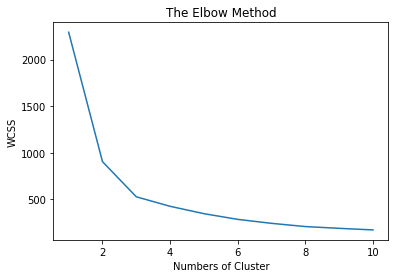

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numbers of Cluster")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans_3n = KMeans(n_clusters=3, init='k-means++')
y_3n = kmeans_3n.fit_predict(X)
y_3n

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
kmeans_4n = KMeans(n_clusters=4, init='k-means++')
y_4n = kmeans_4n.fit_predict(X)
y_4n

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
kmeans_3n.cluster_centers_

array([[18.68451613,  3.61348387,  6.05887097],
       [14.5427027 ,  2.63389459,  5.17486486],
       [11.93756757,  4.83916216,  5.09601351]])

In [26]:
kmeans_4n.cluster_centers_

array([[11.91557143,  4.94612857,  5.08478571],
       [19.15104167,  3.46041667,  6.12725   ],
       [14.01542373,  2.32303729,  5.069     ],
       [16.29484848,  3.86830303,  5.6539697 ]])

Text(0, 0.5, 'Coefficient Assymetry')

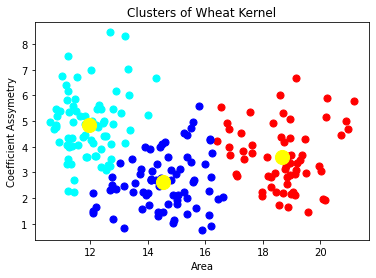

In [37]:
kmeans_3n.cluster_centers_[:,0]

plt.scatter(X[y_3n==0,0], X[y_3n==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_3n==1,0], X[y_3n==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_3n==2,0], X[y_3n==2, 1], s=50, c='cyan', label='cluster1')

plt.scatter(kmeans_3n.cluster_centers_[:,0], kmeans_3n.cluster_centers_[:,1], s=200, c='yellow',label="centroid")

plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("Coefficient Assymetry")
# "kernel_groove_length"

Text(0, 0.5, 'kernel_groove_length')

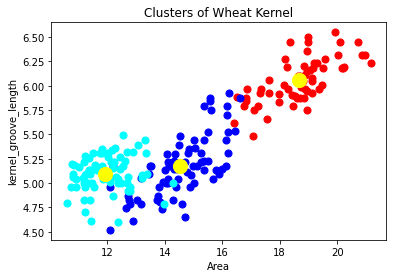

In [39]:
kmeans_3n.cluster_centers_[:,0]

plt.scatter(X[y_3n==0,0], X[y_3n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_3n==1,0], X[y_3n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_3n==2,0], X[y_3n==2, 2], s=50, c='cyan', label='cluster1')

plt.scatter(kmeans_3n.cluster_centers_[:,0], kmeans_3n.cluster_centers_[:,2], s=200, c='yellow',label="centroid")

plt.title("Clusters of Wheat Kernel")
plt.xlabel("Area")
plt.ylabel("kernel_groove_length")

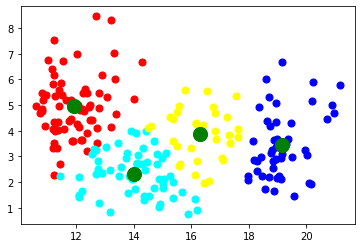

In [42]:
kmeans_4n.cluster_centers_[:,0]

plt.scatter(X[y_4n==0,0], X[y_4n==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,0], X[y_4n==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,0], X[y_4n==2, 1], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,0], X[y_4n==3, 1], s=50, c='yellow', label='cluster4')

plt.scatter(kmeans_4n.cluster_centers_[:,0], kmeans_4n.cluster_centers_[:,1], s=200, c='green',label="centroid")

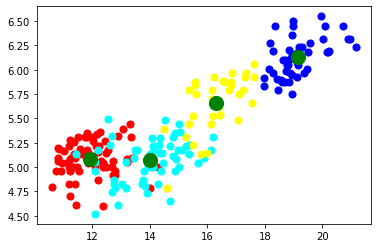

In [44]:
kmeans_4n.cluster_centers_[:,0]

plt.scatter(X[y_4n==0,0], X[y_4n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,0], X[y_4n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,0], X[y_4n==2, 2], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,0], X[y_4n==3, 2], s=50, c='yellow', label='cluster4')

plt.scatter(kmeans_4n.cluster_centers_[:,0], kmeans_4n.cluster_centers_[:,2], s=200, c='green',label="centroid")

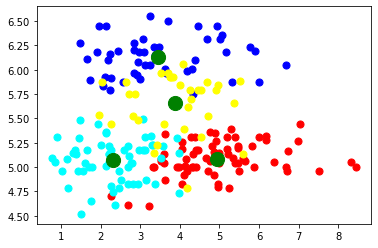

In [45]:
kmeans_4n.cluster_centers_[:,0]

plt.scatter(X[y_4n==0,1], X[y_4n==0, 2], s=50, c='red', label='cluster1')
plt.scatter(X[y_4n==1,1], X[y_4n==1, 2], s=50, c='blue', label='cluster2')
plt.scatter(X[y_4n==2,1], X[y_4n==2, 2], s=50, c='cyan', label='cluster3')
plt.scatter(X[y_4n==3,1], X[y_4n==3, 2], s=50, c='yellow', label='cluster4')

3plt.scatter(kmeans_4n.cluster_centers_[:,1], kmeans_4n.cluster_centers_[:,2], s=200, c='green',label="centroid")

#### As per above analysis we can conclude that 'Area' and 'Coefficient Assymentry' is best fit for kernel identifications

#### using Features like Area vs coeff_asymmetry and kernel_groove_length

In [52]:
# Lets find score 
from sklearn.metrics import silhouette_score
sil_avg= []
for i in range(2, 11):
    cluster_model = KMeans(n_clusters=i, init="k-means++")
    cluster_labels = cluster_model.fit_predict(X)
    sil_avg_score = silhouette_score(X, cluster_labels)
    sil_avg.append(sil_avg_score)

In [53]:
sil_avg

[0.5115974532766332,
 0.46805180745586755,
 0.41034525886055945,
 0.3744845450179229,
 0.3775537583875636,
 0.3797426658670569,
 0.3814690502289047,
 0.36558095169869287,
 0.3377431741584155]

## Lets use Gaussian Mixture

In [54]:
from sklearn.mixture import GaussianMixture

In [56]:
y_gauss = GaussianMixture(n_components=3, random_state=42,).fit(X).predict(X)

In [57]:
y_gauss

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [66]:
from scipy import stats
mapping = {}
for class_id in np.unique(y_gauss):
    mode, _, = stats.mode(y_gauss[y_gauss==class_id])
    print(mode)
    mapping[mode[0]] = class_id
mapping

[0]
[1]
[2]


{0: 0, 1: 1, 2: 2}

In [63]:
np.unique(y_gauss)

array([0, 1, 2], dtype=int64)

In [67]:
y_pred = np.array([mapping[cls] for cls in y_gauss])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

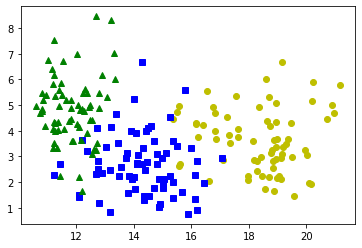

In [69]:
plt.plot(X[y_pred==0, 0], X[y_pred==0,1], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 0], X[y_pred==1,1], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 0], X[y_pred==2,1], 'g^', label='cluster3')

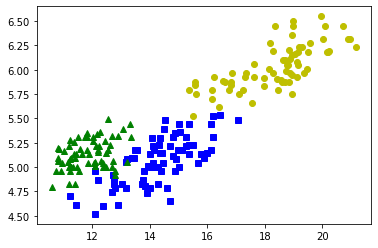

In [70]:
plt.plot(X[y_pred==0, 0], X[y_pred==0,2], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 0], X[y_pred==1,2], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 0], X[y_pred==2,2], 'g^', label='cluster3')

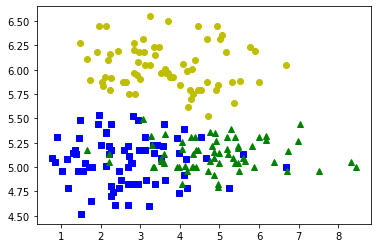

In [73]:
plt.plot(X[y_pred==0, 1], X[y_pred==0,2], 'yo', label='cluster1')
plt.plot(X[y_pred==1, 1], X[y_pred==1,2], 'bs', label='cluster2')
plt.plot(X[y_pred==2, 1], X[y_pred==2,2], 'g^', label='cluster3')

In [75]:
np.sum(y_pred==y_gauss)

210